# Rate Spikes in the Market for Repurchase Agreements


## What is the role of the repo market and why is it important?

The market for repurchase agreements, commonly known as the repo market,
serves as a cornerstone for short-term financing among financial institutions.
This market enables entities, including banks, dealers, money market funds,
insurance companies, pension funds, and other entities, to obtain liquidity on
an overnight basis or for other short tenures, thereby ensuring operational
continuity.  Its collateralized nature minimizes credit risk, making it a
preferred avenue for secure, short-term lending and borrowing. 

Moreover, the repo market is critical in implementing monetary policy, especially considering the diminished role of the unsecured interbank market compared to the secured market following the 2007-2008 financial crisis. Its central role in providing liquidity and facilitating monetary policy execution underscores the necessity of the repo market's efficient functioning for financial stability and the broader economy. Disruptions within this market can have widespread impacts, affecting various financial participants, including banks, money market funds, hedge funds, and corporations.


## Money market dislocations and the repo rate spikes of 2018-2019

Repo rates are the interest rates at which financial institutions borrow or lend funds via repurchase agreements (repos). In recent years, there have been several notable spikes in these rates. The most significant spike occurred in September 2019, although smaller spikes also occurred throughout 2018 and 2019. A repo spike refers to a sudden, substantial increase in repo rates within the financial market. These spikes indicate an abrupt imbalance in the supply and demand for funds in the repo market, leading to an increase in borrowing costs. Such spikes can disrupt the financial system and may signal deeper issues related to liquidity and funding stress.

Additionally, these rate spikes can be seen as dislocations in the money markets. Specifically, these repo spikes represented significant deviations between repo rates and the interest on reserve balances or the Federal Reserve's Overnight Reverse Repo Facility rate (ON/RRP rate). These dislocations imply potential arbitrage opportunities, suggesting that institutions capable of earning interest on reserves or with access to the Fed's ON/RRP facility should theoretically show no preference between using these facilities and lending in the repo markets. Since lending in repo markets typically involves overcollateralization with Treasury securities and occurs overnight, repo market rates should align closely with other near risk-free rates. Understanding the causes of these deviations is crucial for grasping their implications for the financial sector.

## Relationship to Quantitative Investors

See here: https://www.bloomberg.com/news/articles/2023-12-20/inside-the-basis-trade-hedge-fund-traders-dominate-gigantic-bond-bet

![The Hedge Fund Traders Dominating a Massive Bet on Bonds](./assets/hw01_basis_hf.png)

And here: https://www.bloomberg.com/opinion/articles/2024-01-08/the-fed-won-t-do-slow-and-steady-if-the-labor-market-wobbles

![Year-End Money-Markets Angst on Fed Exit Echoes 2018 Crunch](./assets/hw01_repo_vol.png)

What is a basis trade. From this [Reuters article](https://www.reuters.com/markets/us/fed-economists-sound-alarm-hedge-funds-gaming-us-treasuries-2023-09-13/), they say:

> Hedge funds' short positions in some Treasuries futures - contracts for the purchase and sale of bonds for future delivery - have recently hit record highs as part of so-called basis trades, which take advantage of the premium of futures contracts over the price of the underlying bonds, analysts have said.
>
> The trades - typically the domain of macro hedge funds with relative value strategies - consist of selling a futures contract, buying Treasuries deliverable into that contract with repurchase agreement (repo) funding, and delivering them at contract expiry.

The involvement of hedge funds and other asset management companies in this space have receive a lot of attention recently. Some examples:

 - [Citadel’s Ken Griffin warns against hedge fund clampdown to curb basis trade risk](https://www.ft.com/content/927aba63-eff3-44c4-a5df-a5872e988720)
 - [Taming the Treasury basis trade](https://www.ft.com/content/6a752818-3f05-45da-a6f9-c752710d0a9f)
 - [Citadel and Its Peers Are Piling Into the Same Trades. Regulators Are Taking Notice](https://www.bloomberg.com/news/articles/2023-11-30/ken-griffin-s-citadel-hedge-fund-rivals-draw-scrutiny-over-crowding-leverage)
 - [Fed's reverse repo facility drawdown looms large in balance sheet debate](https://www.reuters.com/markets/us/feds-reverse-repo-facility-drawdown-looms-large-balance-sheet-debate-2023-10-31/)
 - [Fed economists sound alarm on hedge funds gaming US Treasuries](https://www.reuters.com/markets/us/fed-economists-sound-alarm-hedge-funds-gaming-us-treasuries-2023-09-13/)

## Understanding Repo Markets Are Important to Understanding the Risks involved in this Trade 

In this homework assignment, we'll create some charts to better understand this market. I also recommend reading this paper, [Kahn et al (2023). "Anatomy of the Repo Rate Spikes in September 2019." Journal of Financial Crises 5, no. 4 (2023): 1-25.](https://elischolar.library.yale.edu/journal-of-financial-crises/vol5/iss4/1/)

We'll replicate Figure 1 from this paper. 

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import load_merged_repo_data

## Repo Rates and Fed Funds Rates
Replicate Figure 1 from "Anatomy of the Repo Rate Spikes"

In [6]:
load_merged_repo_data.series_descriptions

{'DPCREDIT': 'Discount Window Primary Credit Rate',
 'EFFR': 'Effective Federal Funds Rate',
 'OBFR': 'Overnight Bank Funding Rate',
 'SOFR': 'SOFR',
 'IORR': 'Interest on Required Reserves',
 'IOER': 'Interest on Excess Reserves',
 'IORB': 'Interest on Reserve Balances',
 'DFEDTARU': 'Federal Funds Target Range - Upper Limit',
 'DFEDTARL': 'Federal Funds Target Range - Lower Limit',
 'WALCL': 'Federal Reserve Total Assets',
 'TOTRESNS': 'Reserves of Depository Institutions: Total',
 'TREAST': 'Treasuries Held by Federal Reserve',
 'CURRCIR': 'Currency in Circulation',
 'GFDEBTN': 'Federal Debt: Total Public Debt',
 'WTREGEN': 'Treasury General Account',
 'RRPONTSYAWARD': 'Fed ON/RRP Award Rate',
 'RRPONTSYD': 'Treasuries Fed Sold In Temp Open Mark',
 'RPONTSYD': 'Treasuries Fed Purchased In Temp Open Mark',
 'Gen_IORB': 'Interest on Reserves',
 'REPO-TRI_AR_OO-P': 'Tri-Party Average Rate: Overnight/Open (Preliminary)',
 'REPO-TRI_TV_OO-P': 'Tri-Party Transaction Volume: Overnight/Open

In [7]:
new_labels = {
    'REPO-TRI_AR_OO-P':'Tri-Party Overnight Average Rate',
    'RRPONTSYAWARD': 'ON-RRP facility rate',
    'Gen_IORB': 'Interest on Reserves', # This series uses FRED's Interest on 
    # Reserve Balances series. However, this doesn't go back very far, so it is
    # backfilled with interest on excess reserves when necessary.
}

In [9]:
df = load_merged_repo_data.load_all()

The following plot show the effective fed funds rate (from FRED), the tri-party overnight average rate (from the OFR series `REPO-TRI_AR_OO-P`), and the shaded region shows the lower and upper limit of the federal funds target range (`DFEDTARL` and `DFEDTARU`).

<Axes: >

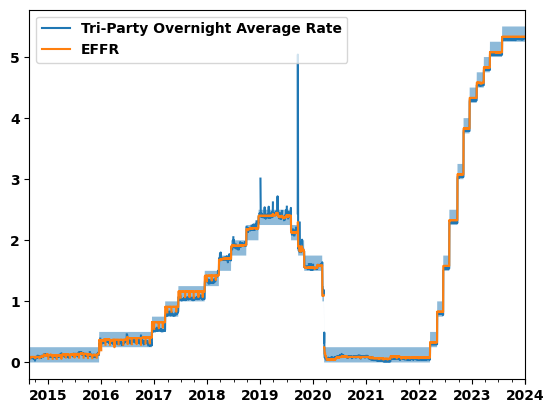

In [10]:
fig, ax = plt.subplots()
ax.fill_between(df.index, df['DFEDTARU'], df['DFEDTARL'], alpha=0.5)
df[['REPO-TRI_AR_OO-P', 'EFFR']].rename(columns=new_labels).plot(ax=ax)

In the following plot, we zoom in a little to see just how large these spikes were.

<Axes: >

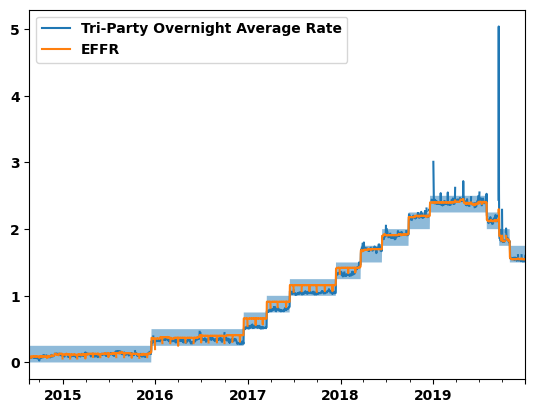

In [11]:
fig, ax = plt.subplots()
date_start = '2014-Aug'
date_end = '2019-Dec'
_df = df.loc[date_start:date_end, :]
ax.fill_between(_df.index, _df['DFEDTARU'], _df['DFEDTARL'], alpha=0.5)
_df[['REPO-TRI_AR_OO-P', 'EFFR']].rename(columns=new_labels).plot(ax=ax)
# plt.ylim(-0.2, 1.0)

Normalize rates to be centered at the fed funds target window midpoint.

In [12]:
df_norm = df.copy()
df['target_midpoint'] = (df['DFEDTARU'] + df['DFEDTARL'])/2
for s in ['DFEDTARU', 'DFEDTARL', 'REPO-TRI_AR_OO-P', 
          'EFFR', 'target_midpoint', 
          'Gen_IORB', 'RRPONTSYAWARD', 'SOFR']:
    df_norm[s] = df[s] - df['target_midpoint']


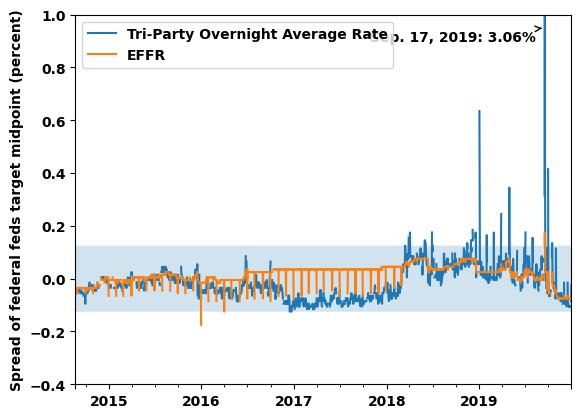

In [13]:
fig, ax = plt.subplots()
date_start = '2014-Aug'
date_end = '2019-Dec'
_df = df_norm.loc[date_start:date_end, :]
ax.fill_between(_df.index, _df['DFEDTARU'], _df['DFEDTARL'], alpha=0.2)
_df[['REPO-TRI_AR_OO-P', 'EFFR']].rename(columns=new_labels).plot(ax=ax)
plt.ylim(-0.4, 1.0)
plt.ylabel("Spread of federal feds target midpoint (percent)")
arrowprops = dict( 
    arrowstyle = "->"
)
ax.annotate('Sep. 17, 2019: 3.06%', 
            xy=('2019-Sep-17', 0.95), 
            xytext=('2017-Oct-27', 0.9),
            arrowprops = arrowprops);

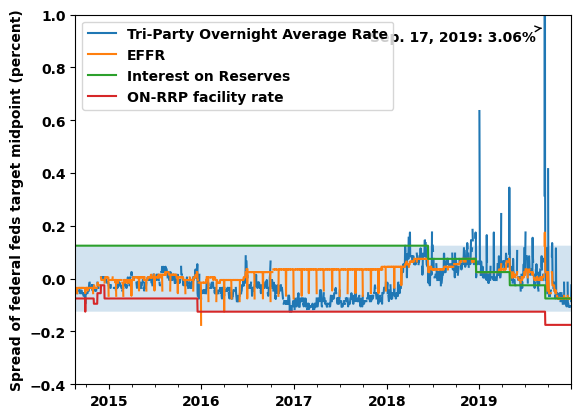

In [14]:
fig, ax = plt.subplots()
date_start = '2014-Aug'
date_end = '2019-Dec'
_df = df_norm.loc[date_start:date_end, :].copy()

ax.fill_between(_df.index, _df['DFEDTARU'], _df['DFEDTARL'], alpha=0.2)
_df[['REPO-TRI_AR_OO-P', 'EFFR', 'Gen_IORB', 'RRPONTSYAWARD']].rename(columns=new_labels).plot(ax=ax)
plt.ylim(-0.4, 1.0)
plt.ylabel("Spread of federal feds target midpoint (percent)")
arrowprops = dict( 
    arrowstyle = "->"
)
ax.annotate('Sep. 17, 2019: 3.06%', 
            xy=('2019-Sep-17', 0.95), 
            xytext=('2017-Oct-27', 0.9),
            arrowprops = arrowprops);

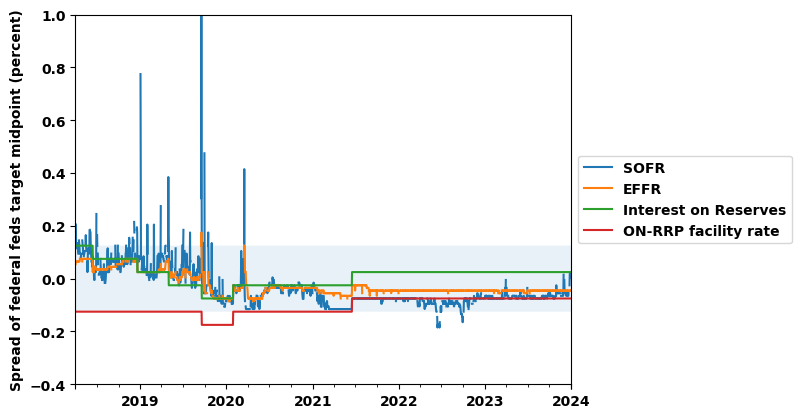

In [15]:
fig, ax = plt.subplots()
date_start = '2018-Apr'
date_end = None
_df = df_norm.loc[date_start:date_end, :].copy()

ax.fill_between(_df.index, _df['DFEDTARU'], _df['DFEDTARL'], alpha=0.1)
_df[['SOFR', 'EFFR', 'Gen_IORB', 'RRPONTSYAWARD']].rename(columns=new_labels).plot(ax=ax)
plt.ylim(-0.4, 1.0)
plt.ylabel("Spread of federal feds target midpoint (percent)")
arrowprops = dict( 
    arrowstyle = "->"
)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.annotate('Sep. 17, 2019: 3.06%', 
#             xy=('2019-Sep-17', 0.95), 
#             xytext=('2015-Oct-27', 0.9),
#             arrowprops = arrowprops);


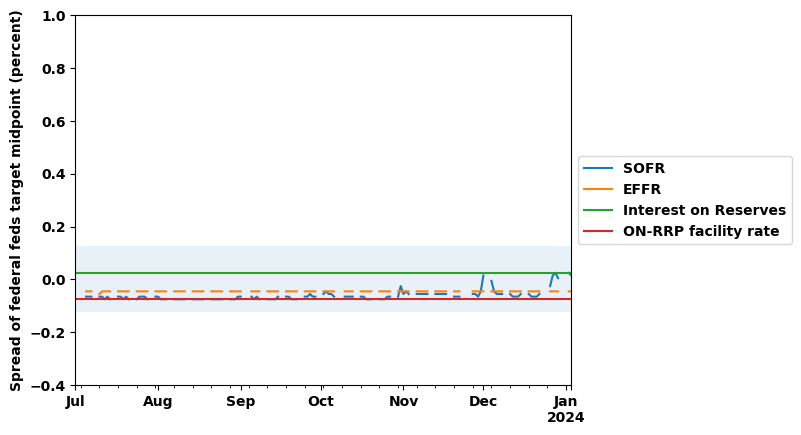

In [16]:
fig, ax = plt.subplots()
date_start = '2023-Jul'
date_end = None
_df = df_norm.loc[date_start:date_end, :].copy()

ax.fill_between(_df.index, _df['DFEDTARU'], _df['DFEDTARL'], alpha=0.1)
_df[['SOFR', 'EFFR', 'Gen_IORB', 'RRPONTSYAWARD']].rename(columns=new_labels).plot(ax=ax)
plt.ylim(-0.4, 1.0)
plt.ylabel("Spread of federal feds target midpoint (percent)")
arrowprops = dict( 
    arrowstyle = "->"
)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.annotate('Sep. 17, 2019: 3.06%', 
#             xy=('2019-Sep-17', 0.95), 
#             xytext=('2015-Oct-27', 0.9),
#             arrowprops = arrowprops);


<Axes: >

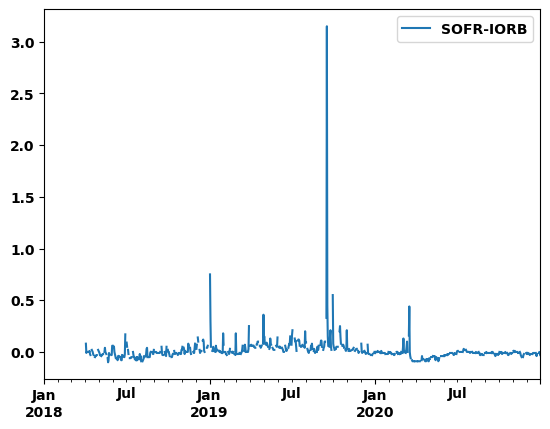

In [17]:
df['SOFR-IORB'] = df['SOFR'] - df['Gen_IORB']
df.loc['2018':'2020', ['SOFR-IORB']].plot()

<Axes: >

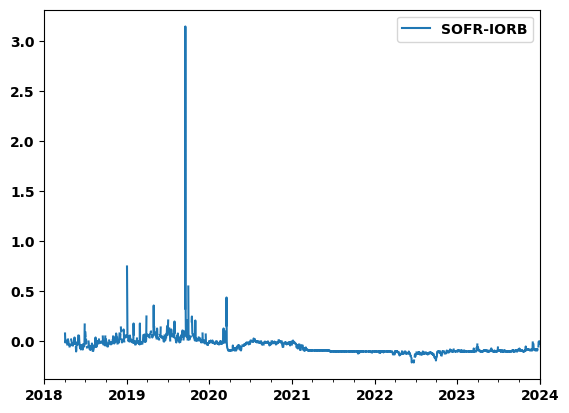

In [18]:
df.loc['2018':, ['SOFR-IORB']].plot()

# Understanding this plot

Now, let's spend some time trying to understand this plot. 

## Reserve Levels vs Spikes
First of all, depository intitutions have a choice between keeping their reserves at the Fed and earning interest on reserve balances or lending the money into repo. When the repo rates were spiking in 2018 and 2019, I would imagine that total reserve levels would be low.

In [19]:
df['net_fed_repo'] = (df['RPONTSYD'] - df['RRPONTSYD']) / 1000
df['triparty_less_fed_onrrp_rate'] = (df['REPO-TRI_AR_OO-P'] - df['RRPONTSYAWARD']) * 100
df['total reserves / currency'] = df['TOTRESNS'] / df['CURRCIR']

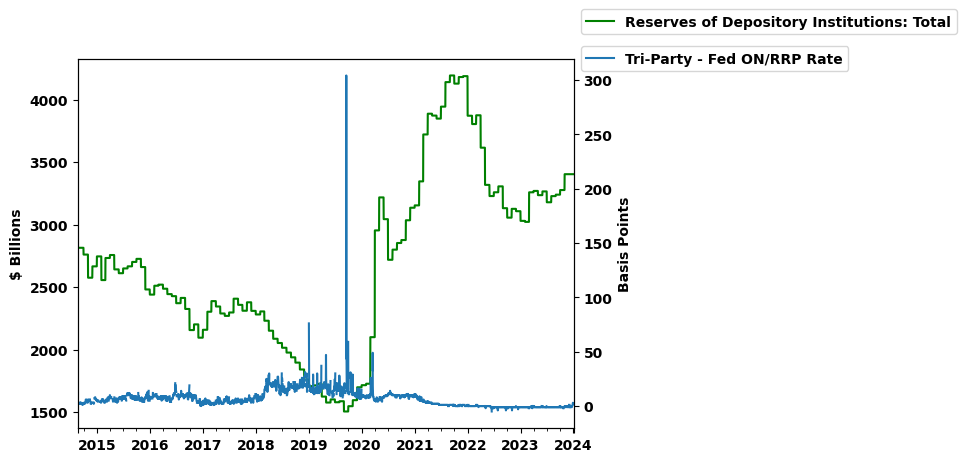

In [20]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
df[['TOTRESNS']].rename(
    columns=load_merged_repo_data.series_descriptions
).plot(ax=ax1,color='g')
ax1.set_ylabel('$ Billions')
ax2.set_ylabel('Basis Points')
ax1.legend(loc='center left', bbox_to_anchor=(1, 1.1))
df[['triparty_less_fed_onrrp_rate']].rename(
    columns={'triparty_less_fed_onrrp_rate':'Tri-Party - Fed ON/RRP Rate'}
).plot(ax=ax2)
ax2.legend(loc='center left', bbox_to_anchor=(1, 1));


Now, let's normalize by currency in circulation, so as to account for the normal growth in the economy or the financial system. This is done because total reserves is not stationary.

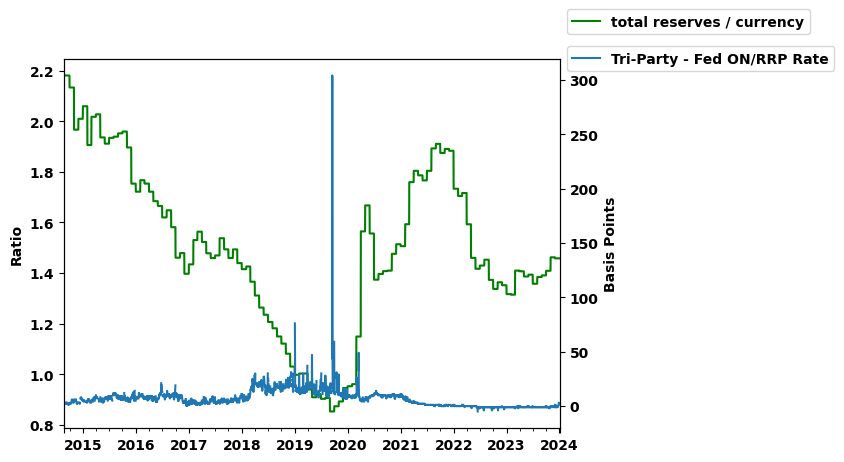

In [21]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
df[['total reserves / currency']].plot(ax=ax1,color='g')
df[['triparty_less_fed_onrrp_rate']].rename(
    columns={'triparty_less_fed_onrrp_rate':'Tri-Party - Fed ON/RRP Rate'}
).plot(ax=ax2)
ax1.set_ylabel('Ratio')
ax2.set_ylabel('Basis Points')
ax1.legend(loc='center left', bbox_to_anchor=(1, 1.1))
ax2.legend(loc='center left', bbox_to_anchor=(1, 1));
# Total Reserves held by depository institutions, divided by currency in circulation

## Fed Repo and Reverse Repo Facility Takeup

<Axes: >

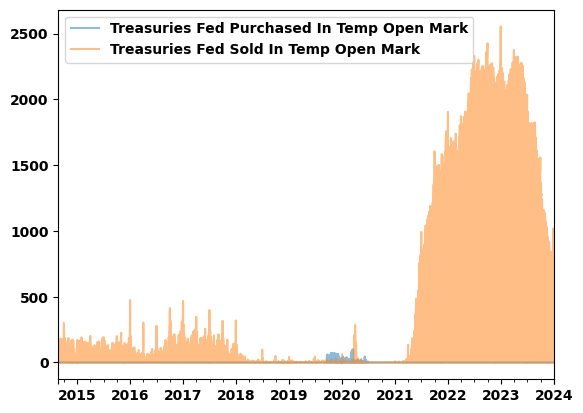

In [22]:
df[['RPONTSYD','RRPONTSYD']].rename(
    columns=load_merged_repo_data.series_descriptions
).plot(alpha=0.5)

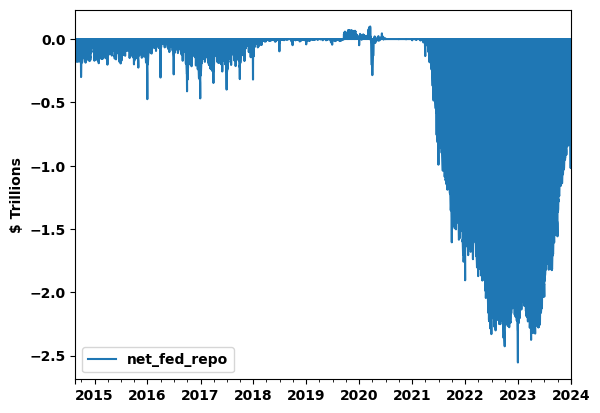

In [23]:
# Net Fed Repo Lending (positive is net lending by the Fed.
# Negative is the use of the reverse repo facility.)
df[['net_fed_repo']].plot()
plt.ylabel('$ Trillions');

In [24]:
# TODO
# # Net Fed Repo Lending (positive is net lending by the Fed.
# # Negative is the use of the reverse repo facility.)
# df.loc['2023',['net_fed_repo']].plot()
# plt.ylabel('$ Trillions');

(-50.0, 100.0)

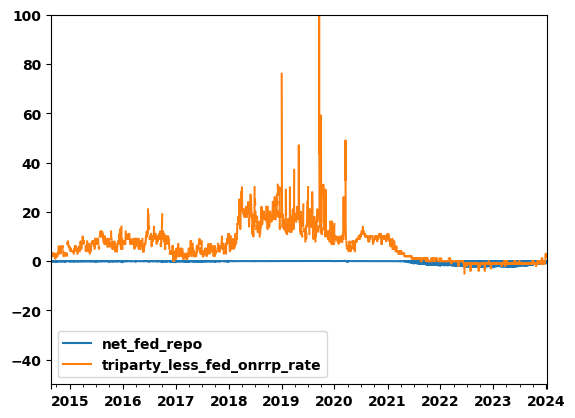

In [25]:
df[['net_fed_repo', 'triparty_less_fed_onrrp_rate']].plot()
plt.ylim([-50,100])

The Fed is lending money when the repo rate is spiking. When the repo rate is low relative to the ON/RRP rate, usage of the ON/RRP facility goes up, as can be seen here.

<Axes: >

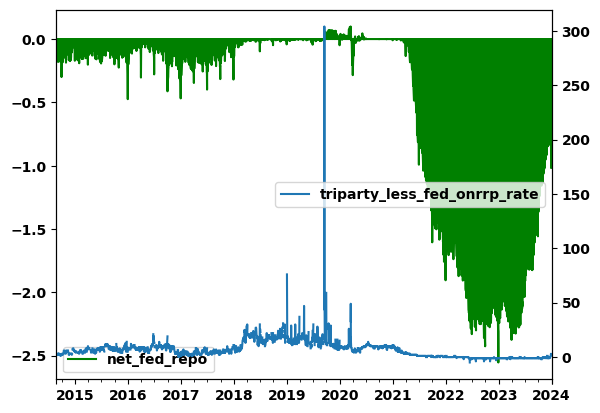

In [26]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
df[['net_fed_repo']].plot(ax=ax1,color='g')
df[['triparty_less_fed_onrrp_rate']].plot(ax=ax2)

# How should we define a repo spike?

Now, I turn to the question of how to define a repo rate spike. 

## Fed Fund's Target Range

The first way to approach this is to just look at when the triparty rate exceeded the upper bound of the fed's federal funds rate target range.

**Tri-Party Ave vs Fed Upper Limit**

In [27]:
df['is_tri_above_fed_upper'] = df['REPO-TRI_AR_OO-P'] > df['DFEDTARU']

In [28]:
df.index[df['is_tri_above_fed_upper']]

DatetimeIndex(['2018-03-29', '2018-04-02', '2018-04-03', '2018-05-31',
               '2018-06-01', '2018-06-04', '2018-06-29', '2018-11-15',
               '2018-11-30', '2018-12-06', '2018-12-07', '2018-12-17',
               '2018-12-18', '2018-12-19', '2018-12-31', '2019-01-02',
               '2019-01-03', '2019-01-31', '2019-02-28', '2019-03-29',
               '2019-04-30', '2019-05-01', '2019-07-03', '2019-07-05',
               '2019-07-31', '2019-09-16', '2019-09-17', '2019-09-18',
               '2019-09-30', '2019-10-16', '2020-03-04', '2020-03-16',
               '2020-03-17'],
              dtype='datetime64[ns]', freq=None)

In [29]:
len(df.index[df['is_tri_above_fed_upper']])

33

**SOFR vs Fed Upper Limit**

In [30]:
df['is_SOFR_above_fed_upper'] = df['SOFR'] > df['DFEDTARU']
len(df.index[df['is_SOFR_above_fed_upper']])

42

In [31]:
df.index[df['is_SOFR_above_fed_upper']]

DatetimeIndex(['2018-04-03', '2018-04-11', '2018-04-16', '2018-04-17',
               '2018-04-30', '2018-05-01', '2018-05-15', '2018-05-31',
               '2018-06-01', '2018-06-04', '2018-06-29', '2018-07-02',
               '2018-11-15', '2018-11-16', '2018-11-30', '2018-12-04',
               '2018-12-06', '2018-12-07', '2018-12-17', '2018-12-18',
               '2018-12-19', '2018-12-31', '2019-01-02', '2019-01-03',
               '2019-01-31', '2019-02-28', '2019-03-29', '2019-04-30',
               '2019-05-01', '2019-07-02', '2019-07-03', '2019-07-05',
               '2019-07-31', '2019-09-16', '2019-09-17', '2019-09-18',
               '2019-09-25', '2019-09-30', '2019-10-16', '2019-10-31',
               '2020-03-16', '2020-03-17'],
              dtype='datetime64[ns]', freq=None)

**SOFR vs Interest of Reserves**

This measure is good because it represents a kind of arbitrage opportunity. Either leave money at Fed to earn interest, or put money into repo market. This is what the paper, "Reserves were not so amply after all" uses.

<Axes: >

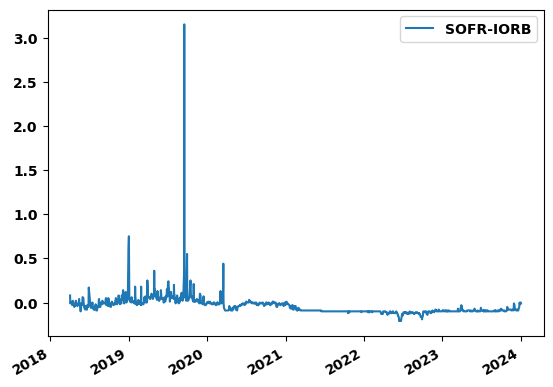

In [32]:
df[['SOFR-IORB']].dropna(how='all').plot()

In [33]:
df['is_SOFR_above_IORB'] =df['SOFR-IORB'] > 0
len(df.index[df['is_SOFR_above_IORB']])

257

In [34]:
df.index[df['is_SOFR_above_IORB']]

DatetimeIndex(['2018-04-03', '2018-04-11', '2018-04-16', '2018-04-17',
               '2018-04-30', '2018-05-01', '2018-05-15', '2018-05-31',
               '2018-06-01', '2018-06-04',
               ...
               '2020-07-02', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-20', '2020-07-21', '2020-11-02',
               '2020-11-05', '2021-01-05'],
              dtype='datetime64[ns]', length=257, freq=None)

Now, let's ask if it's 2 standard deviations above IORB

In [35]:
df['SOFR-IORB'].std()

0.11402966122416433

In [36]:
df['is_SOFR_2std_above_IORB'] = df['SOFR-IORB'] > 2 * df['SOFR-IORB'].std()
len(df.index[df['is_SOFR_2std_above_IORB']])

12

In [37]:
df.index[df['is_SOFR_2std_above_IORB']]

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-03-29',
               '2019-04-30', '2019-07-05', '2019-09-16', '2019-09-17',
               '2019-09-18', '2019-09-30', '2019-10-16', '2020-03-17'],
              dtype='datetime64[ns]', freq=None)

In [38]:
df['SOFR-IORB'].mean()

-0.04376912378303209

In [39]:
df.index[df['is_SOFR_2std_above_IORB']].intersection(df.index[df['is_SOFR_above_fed_upper']])

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-03-29',
               '2019-04-30', '2019-07-05', '2019-09-16', '2019-09-17',
               '2019-09-18', '2019-09-30', '2019-10-16', '2020-03-17'],
              dtype='datetime64[ns]', freq=None)

In [40]:
len(df.index[df['is_SOFR_2std_above_IORB']].intersection(df.index[df['is_SOFR_above_fed_upper']]))

12

In [41]:
# filedir = Path(OUTPUT_DIR)
# df[
#     ['is_SOFR_above_fed_upper', 'is_SOFR_2std_above_IORB', 
#     'is_SOFR_above_IORB', 'is_tri_above_fed_upper']
#   ].to_csv(filedir / 'is_spike.csv')

# Summary Stats about Various Repo Rates

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3422 entries, 2014-08-22 to 2024-01-03
Freq: D
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DPCREDIT                      3422 non-null   float64
 1   EFFR                          2352 non-null   float64
 2   OBFR                          2865 non-null   float64
 3   SOFR                          1438 non-null   float64
 4   IORR                          2533 non-null   float64
 5   IOER                          2533 non-null   float64
 6   IORB                          889 non-null    float64
 7   DFEDTARU                      3422 non-null   float64
 8   DFEDTARL                      3422 non-null   float64
 9   WALCL                         3417 non-null   float64
 10  TOTRESNS                      3412 non-null   float64
 11  TREAST                        3417 non-null   float64
 12  CURRCIR                       3412 n

I don't include GCF in this first comparison, because it has a lot of missing values. I want to only compare values for which all rates are non-null. That's why I drop the whole row when any rate is missing.

Here, we see that DVP average is lower than Triparty average. SOFR is closer to triparty, but is still lower. This is because SOFR tries to remove specials.

Notice, however, that this is different when comparing the 75% percentiles. SOFR is higher than triparty and DVP is even higher.

In [43]:
df[['SOFR', 'REPO-TRI_AR_OO-P', 'REPO-DVP_AR_OO-P']].dropna().describe()

,SOFR,REPO-TRI_AR_OO-P,REPO-DVP_AR_OO-P
count,990.000000,990.000000,990.000000
mean,1.762586,1.765727,1.736384
std,2.072746,2.060057,2.069481
min,0.010000,0.020000,-0.080000
25%,0.050000,0.060000,0.030000
50%,0.300000,0.300000,0.235000
75%,3.820000,3.797500,3.790000
max,5.400000,5.330000,5.430000


Now, I include GCF. It appears that GCF is the highest. Borrow low at tri-party, lend higher into SOFR (but lower to specials) and lend highest to GCF.

In [44]:
df[['SOFR', 'REPO-TRI_AR_OO-P', 'REPO-DVP_AR_OO-P', 'REPO-GCF_AR_OO-P']].dropna().describe()

,SOFR,REPO-TRI_AR_OO-P,REPO-DVP_AR_OO-P,REPO-GCF_AR_OO-P
count,56.000000,56.000000,56.000000,56.000000
mean,3.725000,3.714107,3.694464,3.784107
std,1.952107,1.940274,1.953449,1.971004
min,0.010000,0.040000,-0.010000,0.030000
25%,2.812500,2.830000,2.687500,2.865000
50%,4.550000,4.540000,4.505000,4.620000
75%,5.062500,5.042500,5.050000,5.152500
max,5.350000,5.300000,5.340000,5.430000
